In [2]:
#rm(list=ls())

#Se utiliza pacman para instalar y cargar paquetes
if(!require('pacman')) install.packages('pacman')
pacman::p_load(tidyverse,
               gt,webshot2,
               showtext,
               magick, 
               scales)

Cargando paquete requerido: pacman



In [3]:
font_add_google("Roboto", "pop")
showtext_auto()

In [ ]:
#Función para crear tabla
crea_tabla <- function(df, titulo, subtitulo,nota="",nombre_archivo){

  # Format the numeric columns with commas
  formatted_df <- df #|>
    #mutate(across(where(is.numeric), ~scales::comma(.)))

  # Checa si existe la columna "Organismo" para agrupar la tabla
  if("Organismo" %in% names(df)) {
    gt_table <- formatted_df |>
      gt(rowname_col = "Organismo",
         groupname_col = "Año",
         row_group_as_column = TRUE)
  } else {
    gt_table <- formatted_df |>
      gt()
  }

  gt_table <- gt_table |>
    tab_options(
      column_labels.font.weight = "bold",
    ) |>
    tab_header(
      title = md(paste0("**", titulo, "**")),
      subtitle=md(paste0("*", subtitulo, "*"))
    ) |>
    tab_options(
      table.font.names = 'Poppins',
      source_notes.font.size = 8,
      table.border.top.width = px(0),
      table.border.bottom.width = px(0),
      column_labels.background.color = "#9F2241",
      column_labels.font.size = 10,
    heading.title.font.size = 15,
    ) |>
    cols_align(
      align = "center"
    ) |>
    tab_source_note(
      source_note = md("")
    ) |>
    tab_source_note(
      source_note = md(nota)
    ) |>
    tab_source_note(
      source_note = md("")
    )|>
    cols_width(
      everything() ~ px(180)
    )

  # Salva la tabla
  gtsave(gt_table, filename = nombre_archivo)

  # Muestra la imagen
  img <- image_read(nombre_archivo)
  return(img)
}

In [5]:
ingresos_cdmx <- read_csv("https://datos.cdmx.gob.mx/dataset/f04b7092-782d-4206-9590-ac8b577891dc/resource/77c2e268-f5b4-4cdf-a705-13a73a9608b3/download/ingresos_2024_01.csv", 
                          col_types = NULL)

Rows: 2281 Columns: 16
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (10): periodo, desc_tipo_recurso_clase, desc_rubro, desc_tipo, clase, de...
dbl  (6): ciclo, tipo_recurso_clase, rubro, tipo, monto_estimado, monto_reca...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [6]:
#MONTO TOTAL DE INGRESOS RECAUDADOS
recaudados_por_ciclo <- ingresos_cdmx|>
  filter(periodo == "Anual")|>
  group_by(ciclo)|>
  summarise(montoest = sum(monto_estimado, na.rm = TRUE)/1000000)|>
  mutate(var = round((montoest/lag(montoest, 1)-1)*100,1), 
         var = as.character(var),
         var = case_when(is.na(var) ~ "-",
          TRUE ~ var))|>
  rename(`Monto estimado`=montoest,
         `Año` = ciclo, 
         `Var. porcentual`= var)|>
  mutate(`Monto estimado` = format(`Monto estimado`, big.mark = ",", decimal.mark = "."))

   

recaudados_por_ciclo


Año,Monto estimado,Var. porcentual
<dbl>,<chr>,<chr>
2018,"226,851.9",-
2019,"234,016.3",3.2
2020,"238,975.8",2.1
2021,"217,962.2",-8.8
2022,"234,000.9",7.4
2023,"248,415.1",6.2
2024,"267,965.4",7.9


file:///C:/Users/brenp/AppData/Local/Temp/Rtmp2XPxeO/file264020fa1f5d.html screenshot completed



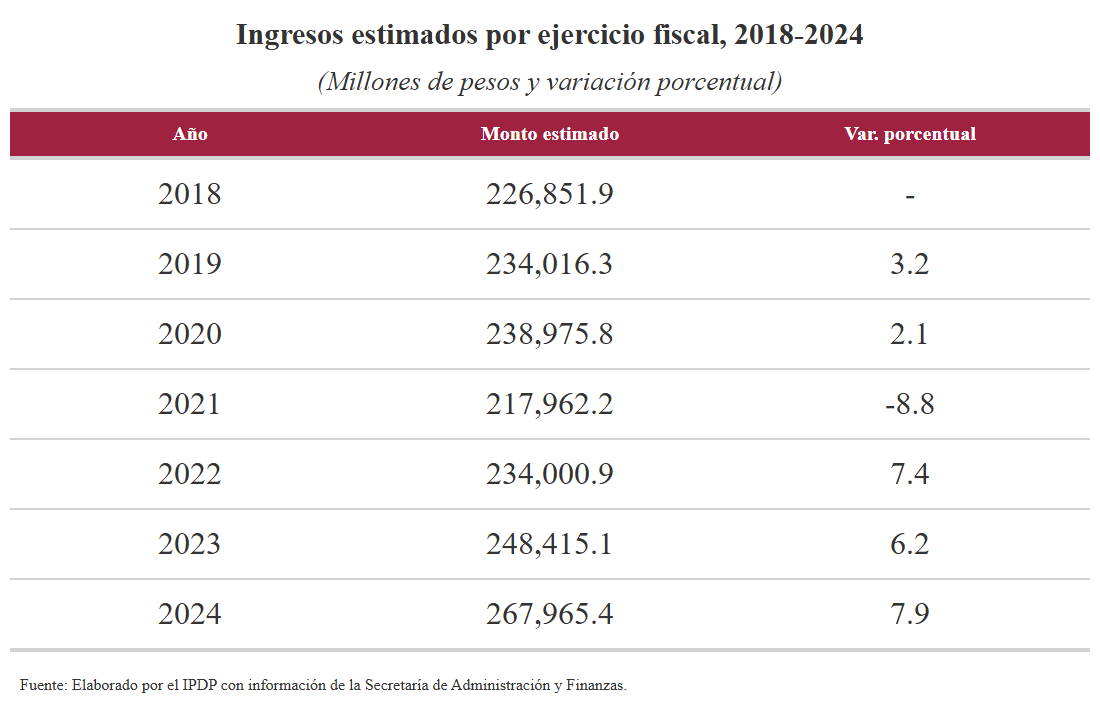

# A tibble: 1 × 7
  format width height colorspace matte filesize density
  <chr>  <int>  <int> <chr>      <lgl>    <int> <chr>  
1 PNG     1100    728 sRGB       FALSE    44084 72x72  

In [7]:
crea_tabla(recaudados_por_ciclo,"Ingresos estimados por ejercicio fiscal, 2018-2024","(Millones de pesos y variación porcentual)","Fuente: Elaborado por el IPDP con información de la Secretaría de Administración y Finanzas.","tabla_prueba.png")

In [18]:
#MONTO TOTAL DE INGRESO RECAUDADO POR RUBRO
recaudados_por_ciclo_por_clase <- ingresos_cdmx|>
  filter(periodo == "Anual")|>
  group_by(ciclo, desc_tipo_recurso_clase)|>
  summarise(montoest = sum(monto_estimado, na.rm = TRUE)/1000000)|>
  mutate(porcentaje = round(((montoest*100)/sum(montoest)),1))|>
  rename(`Monto estimado` = montoest,
         Porcentaje = porcentaje, 
         `Clase` = desc_tipo_recurso_clase, 
          Año = ciclo)
  
recaudados_por_ciclo_por_clase

`summarise()` has grouped output by 'ciclo'. You can override using the
`.groups` argument.


Año,Clase,Monto estimado,Porcentaje
<dbl>,<chr>,<dbl>,<dbl>
2018,Endeudamiento,5500.00,2.4
2018,Ingresos del Sector Paraestatal,15981.90,7.0
2018,Ingresos locales,91886.01,40.5
2018,Recursos federales,113483.99,50.0
2019,Endeudamiento,5500.00,2.4
2019,Ingresos del Sector Paraestatal,16344.70,7.0
2019,Ingresos locales,92762.95,39.6
2019,Recursos federales,119408.68,51.0
2020,Endeudamiento,4000.00,1.7


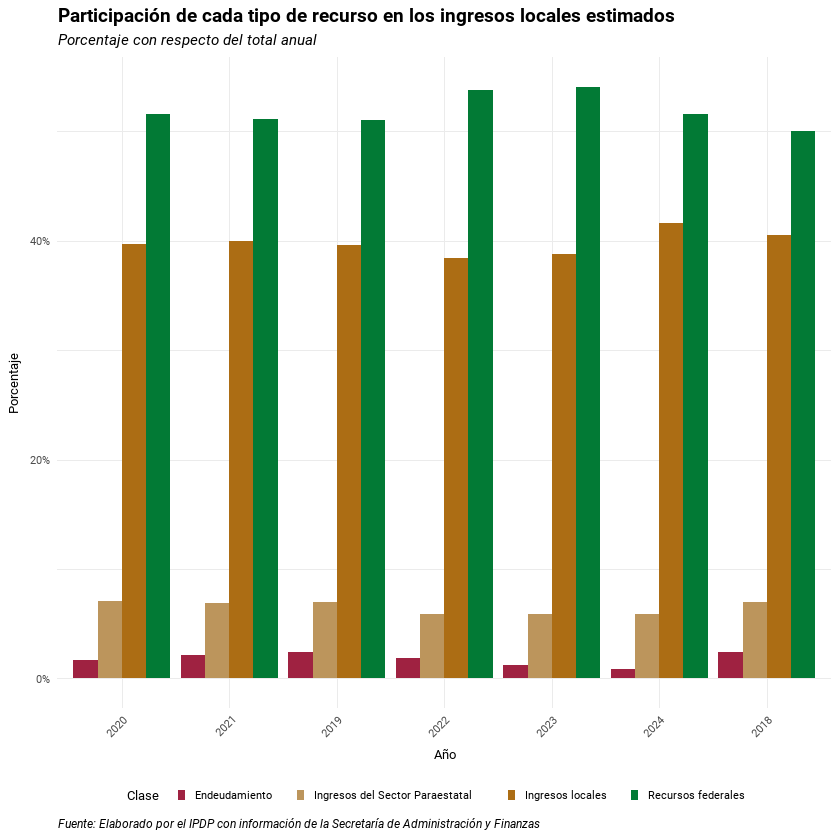

In [28]:
#Quitar los na
recaudados_por_ciclo_por_clase <- recaudados_por_ciclo_por_clase |>
  filter(!is.na(Porcentaje))|>
  arrange(Porcentaje)

# Gráfica corregida
ggplot(recaudados_por_ciclo_por_clase, aes(x = Año, y = Porcentaje, fill = Clase)) +
  geom_col(position = "dodge") +
  scale_fill_manual(values = paleta_ipdp) +
  labs(
    title = "Participación de cada tipo de recurso en los ingresos locales estimados",
    subtitle = "Porcentaje con respecto del total anual",
    x = "Año",
    y = "Porcentaje",
    fill = "Clase", 
    caption = "Fuente: Elaborado por el IPDP con información de la Secretaría de Administración y Finanzas"
  ) +
  scale_y_continuous(labels = percent_format(scale = 1)) +  # sin límites fijos
  theme_minimal(base_size = 10) +
  theme(
    text = element_text(family = "pop"),
    axis.text.x = element_text(angle = 45, hjust = 1),
    plot.title = element_text(face = "bold", size = 14),
    plot.subtitle = element_text(face = "italic", size = 11),
    legend.position = "bottom",
    legend.direction = "horizontal",
    legend.key.size = unit(0.2, "cm"),
    plot.caption = element_text(hjust = 0, size = 9, face = "italic")
  )

In [9]:
ing_loc <- ingresos_cdmx |>
  filter(periodo == "Anual") |>
  group_by(ciclo, desc_tipo_recurso_clase, desc_clase) |>
  summarise(montoest = sum(monto_estimado, na.rm = TRUE)/1000000)|>
  ungroup() |>
  group_by(ciclo) |>
  mutate(porcentaje = round((montoest * 100) / sum(montoest), 1)) |>
  ungroup() |>
  filter(desc_tipo_recurso_clase == "Ingresos locales")|>
  rename(`Monto estimado` = montoest,
         Porcentaje = porcentaje, 
         `Clase del recurso` = desc_tipo_recurso_clase, 
         Clase = desc_clase, 
         Año = ciclo)

sumas <- ing_loc|>
filter(Año == 2019)

sum(sumas$`Monto estimado`)
sum(sumas$Porcentaje)

head(ing_loc)
colnames(ing_loc)

`summarise()` has grouped output by 'ciclo', 'desc_tipo_recurso_clase'. You can
override using the `.groups` argument.


[1] 92762.95

[1] 39.3

Año,Clase del recurso,Clase,Monto estimado,Porcentaje
<dbl>,<chr>,<chr>,<dbl>,<dbl>
2018,Ingresos locales,Accesorios de los Aprovechamientos,29.60944,0.0
2018,Ingresos locales,Accesorios de los Derechos,240.54646,0.1
2018,Ingresos locales,Accesorios de los Impuestos,712.89429,0.3
2018,Ingresos locales,Aprovechamientos por Participaciones Derivadas de la Aplicación de Leyes,50.83137,0.0
2018,Ingresos locales,Aprovechamientos provenientes de obras públicas,384.10573,0.2
2018,Ingresos locales,"Derivados del uso, aprovechamiento o enajenación de bienes no sujetos al régimen de dominio público",447.44898,0.2


[1] "Año"               "Clase del recurso" "Clase"            
[4] "Monto estimado"    "Porcentaje"

In [10]:
representativos_ciclo <- ing_loc|>
filter(Clase %in% c("Predial", 
                        "Productos derivados del uso y aprovechamiento de bienes no sujetos a régimen de dominio público", 
                        "Sobre Nóminas", 
                        "Sobre Adquisición de Inmuebles", 
                        "Por la Prestación de Servicios por el Suministro de Agua",
                        "Control Vehicular"))

representativos_ciclo                        

agrupados_ciclo <- representativos_ciclo|>
group_by(Año)|>
summarise(sumas = sum(Porcentaje))

agrupados_ciclo

Año,Clase del recurso,Clase,Monto estimado,Porcentaje
<dbl>,<chr>,<chr>,<dbl>,<dbl>
2018,Ingresos locales,Por la Prestación de Servicios por el Suministro de Agua,6869.260,3.0
2018,Ingresos locales,Predial,15397.465,6.8
2018,Ingresos locales,Productos derivados del uso y aprovechamiento de bienes no sujetos a régimen de dominio público,10916.779,4.8
2018,Ingresos locales,Sobre Adquisición de Inmuebles,9310.551,4.1
2018,Ingresos locales,Sobre Nóminas,25664.936,11.3
2019,Ingresos locales,Por la Prestación de Servicios por el Suministro de Agua,7230.896,3.1
2019,Ingresos locales,Predial,16973.461,7.3
2019,Ingresos locales,Productos derivados del uso y aprovechamiento de bienes no sujetos a régimen de dominio público,12048.247,5.1
2019,Ingresos locales,Sobre Adquisición de Inmuebles,8486.443,3.6


Año,sumas
<dbl>,<dbl>
2018,30.0
2019,29.5
2020,30.7
2021,31.6
2022,31.2
2023,31.3
2024,33.2


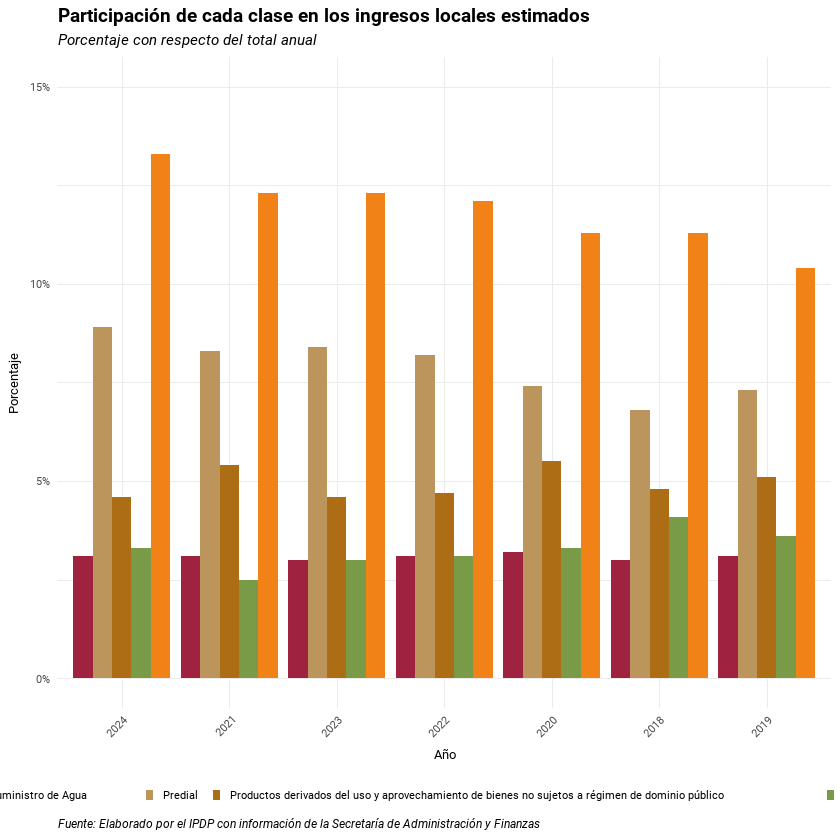

In [12]:
#MONTO TOTAL DE INGRESO RECAUDADO POR RUBRO
recaudados_por_ciclo_por_rubro <- ingresos_cdmx|>
  filter(periodo == "Anual")|>
  group_by(ciclo, desc_rubro)|>
  summarise(montoest = sum(monto_estimado, na.rm = TRUE)/1000000)

recaudados_por_ciclo_por_rubro

`summarise()` has grouped output by 'ciclo'. You can override using the
`.groups` argument.


ciclo,desc_rubro,montoest
<dbl>,<chr>,<dbl>
2018,Aprovechamientos,6649.702
2018,Cuotas y Aportaciones de Seguridad Social,3596.722
2018,Derechos,14003.619
2018,Impuestos,57940.607
2018,Ingresos Derivados de Financiamientos,5500.000
2018,"Ingresos por Venta de Bienes, Prestación de Servicios y Otros Ingresos",12385.174
2018,"Participaciones, Aportaciones, Convenios, Incentivos Derivados de la Colaboración Fiscal y Fondos Distintos de Aportaciones",113483.988
2018,Productos,13292.085
2019,Aprovechamientos,6178.237


In [ ]:
tasas_rubros <- ingresos_cdmx |>
  filter(ciclo %in% c(2019, 2023),
        
        
          desc_tipo_recurso_clase == "Ingresos locales")|>
  select(ciclo, desc_clase, monto_estimado) |>
  group_by(ciclo, desc_clase) |>
  summarise(montoest = sum(monto_estimado, na.rm = TRUE)) |>
  pivot_wider(names_from = ciclo, values_from = montoest, names_prefix = "ciclo_") |>
  mutate(tcma = ((ciclo_2023 / ciclo_2019)^(1/(2023-2019)) - 1) * 100) |>
  arrange(desc(tcma))



tasas_rubros


`summarise()` has grouped output by 'ciclo'. You can override using the
`.groups` argument.


desc_clase,ciclo_2019,ciclo_2023,tcma
<chr>,<dbl>,<dbl>,<dbl>
Indemnizaciones,139468839,510375800,38.3098856
"Por la Supervisión y Revisión de las Obras Públicas Sujetas a Contrato, así como la Auditoría de las mismas",276664711,854247490,32.5584710
Predial,72772327583,93194212258,6.3789426
Sobre Nóminas,86295851939,109834238330,6.2152695
Sobre Espectáculos Públicos,1452118577,1725811286,4.4113728
Por la Prestación de Servicios de Registro Civil,850724484,985691468,3.7499787
Multas,3180658984,3682270337,3.7288684
"Por la Prestación de Servicios del Registro Público de la Propiedad y de Comercio, y del Archivo General de Notarías",5205742553,5904490601,3.1988689
Por la Prestación de Servicios por el Suministro de Agua,25534687583,27204577950,1.5962928
